# 📊 Exploratory Data Analysis — Rossmann Store Sales

### Objectives
- Understand the structure and quality of the raw data
- Identify missing values and handle them
- Explore sales distributions, trends, and seasonality
- Analyze the impact of promotions, holidays, and store types
- Extract key insights to guide feature engineering

## 1. Imports & Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

## 2. Load Data

> **Expected files** (place in `data/raw/`):
> - `train.csv` — historical daily sales per store
> - `store.csv` — metadata about each store
> - `test.csv`  — stores & dates to forecast (optional here)

In [3]:
RAW_PATH = '../data/raw/'

train  = pd.read_csv(RAW_PATH + 'train.csv',  parse_dates=['Date'], low_memory=False)
store  = pd.read_csv(RAW_PATH + 'store.csv')
test   = pd.read_csv(RAW_PATH + 'test.csv',   parse_dates=['Date'], low_memory=False)

print(f'Train shape : {train.shape}')
print(f'Store shape : {store.shape}')
print(f'Test  shape : {test.shape}')

Train shape : (1017209, 9)
Store shape : (1115, 10)
Test  shape : (41088, 8)


## 3. Initial Data Inspection

In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Column dtypes & non-null counts
print('--- train.csv info ---')
train.info()
print('\n--- store.csv info ---')
store.info()

--- train.csv info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB

--- store.csv info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------              

In [7]:
train.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01


In [8]:
store.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


## 4. Missing Value Analysis

In [9]:
def missing_summary(df, name):
    missing = df.isnull().sum()
    pct     = (missing / len(df) * 100).round(2)
    summary = pd.DataFrame({'Missing Count': missing, 'Missing %': pct})
    summary = summary[summary['Missing Count'] > 0].sort_values('Missing %', ascending=False)
    print(f'\n=== Missing values in {name} ===')
    print(summary if not summary.empty else 'No missing values!')
    return summary

mv_train = missing_summary(train, 'train.csv')
mv_store = missing_summary(store, 'store.csv')


=== Missing values in train.csv ===
No missing values!

=== Missing values in store.csv ===
                           Missing Count  Missing %
Promo2SinceYear                      544      48.79
Promo2SinceWeek                      544      48.79
PromoInterval                        544      48.79
CompetitionOpenSinceMonth            354      31.75
CompetitionOpenSinceYear             354      31.75
CompetitionDistance                    3       0.27


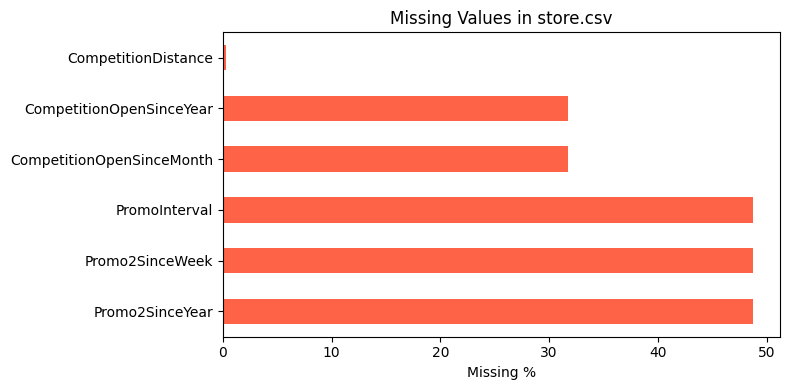

In [10]:
# Visualise missing values in store.csv
if not mv_store.empty:
    fig, ax = plt.subplots(figsize=(8, 4))
    mv_store['Missing %'].plot(kind='barh', ax=ax, color='tomato')
    ax.set_xlabel('Missing %')
    ax.set_title('Missing Values in store.csv')
    plt.tight_layout()
    plt.savefig('../reports/figures/missing_values.png', dpi=150)
    plt.show()

## 5. Merge Train + Store

In [11]:
df = train.merge(store, on='Store', how='left')

# Filter: only open stores with positive sales
df_open = df[(df['Open'] == 1) & (df['Sales'] > 0)].copy()

print(f'Full merged shape     : {df.shape}')
print(f'Open + positive sales : {df_open.shape}')
print(f'Date range            : {df_open.Date.min()} → {df_open.Date.max()}')
print(f'Unique stores         : {df_open.Store.nunique()}')

Full merged shape     : (1017209, 18)
Open + positive sales : (844338, 18)
Date range            : 2013-01-01 00:00:00 → 2015-07-31 00:00:00
Unique stores         : 1115


## 6. Target Variable — Sales Distribution

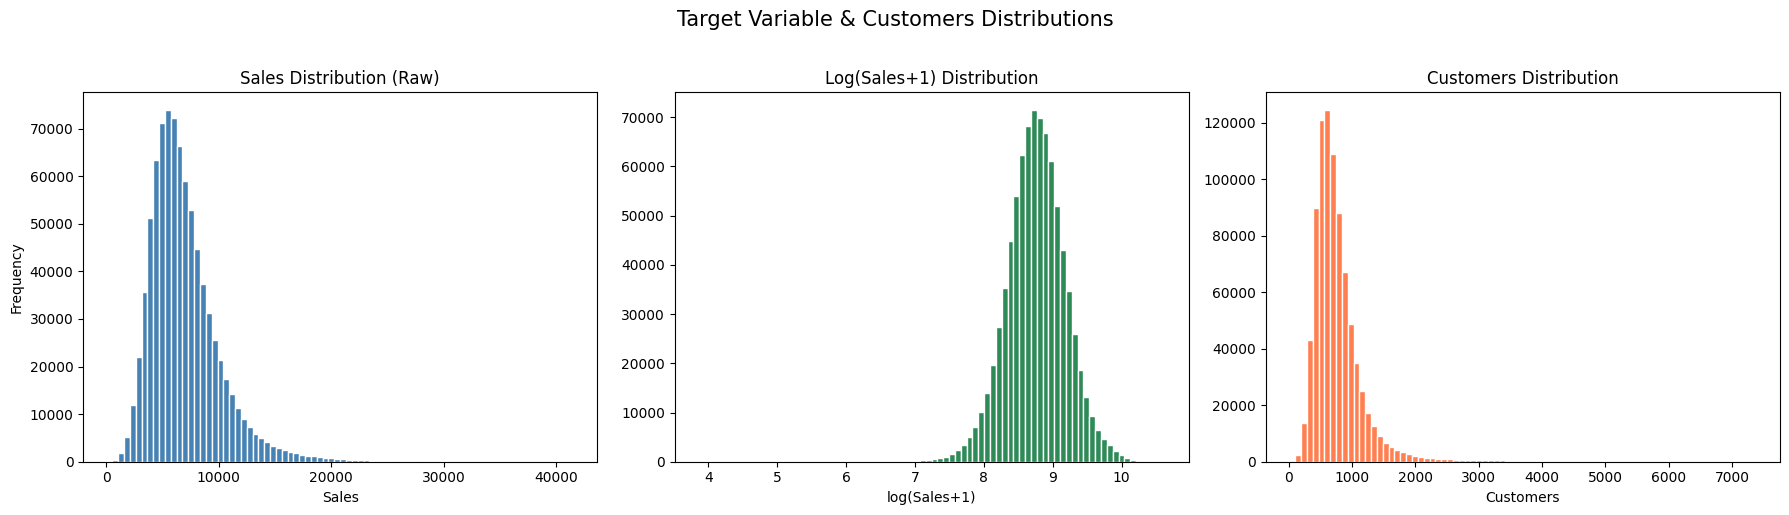

Skewness (Sales)     : 1.595
Skewness log(Sales+1): -0.109


In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Raw distribution
axes[0].hist(df_open['Sales'], bins=80, color='steelblue', edgecolor='white')
axes[0].set_title('Sales Distribution (Raw)')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

# Log distribution
axes[1].hist(np.log1p(df_open['Sales']), bins=80, color='seagreen', edgecolor='white')
axes[1].set_title('Log(Sales+1) Distribution')
axes[1].set_xlabel('log(Sales+1)')

# Customers distribution
axes[2].hist(df_open['Customers'], bins=80, color='coral', edgecolor='white')
axes[2].set_title('Customers Distribution')
axes[2].set_xlabel('Customers')

plt.suptitle('Target Variable & Customers Distributions', fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/sales_distribution.png', dpi=150)
plt.show()

print(f"Skewness (Sales)     : {df_open['Sales'].skew():.3f}")
print(f"Skewness log(Sales+1): {np.log1p(df_open['Sales']).skew():.3f}")

In [13]:
df[['Sales','Customers']].corr()

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


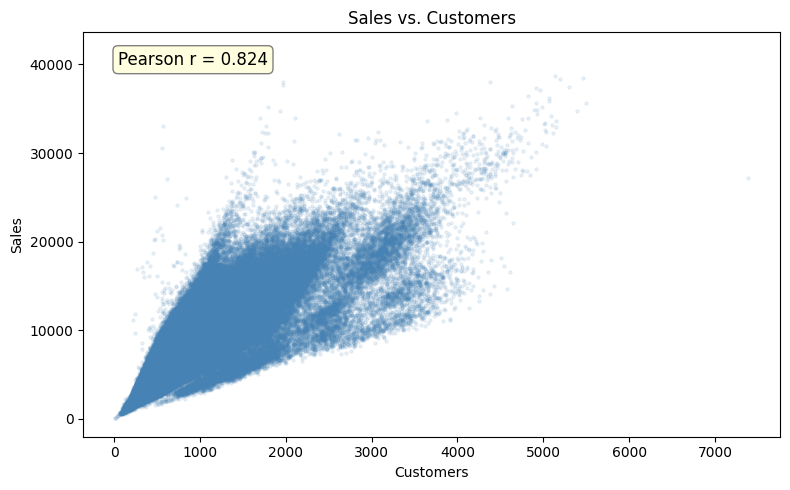

Pearson correlation (Sales ~ Customers): 0.8236


In [14]:
# Sales vs Customers scatter
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_open['Customers'], df_open['Sales'], alpha=0.1, s=5, color='steelblue')
ax.set_xlabel('Customers')
ax.set_ylabel('Sales')
ax.set_title('Sales vs. Customers')

corr = df_open[['Sales', 'Customers']].corr().iloc[0, 1]
ax.annotate(f'Pearson r = {corr:.3f}', xy=(0.05, 0.92), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray'))
plt.tight_layout()
plt.show()

print(f'Pearson correlation (Sales ~ Customers): {corr:.4f}')

## 7. Time Series — Overall Sales Trend

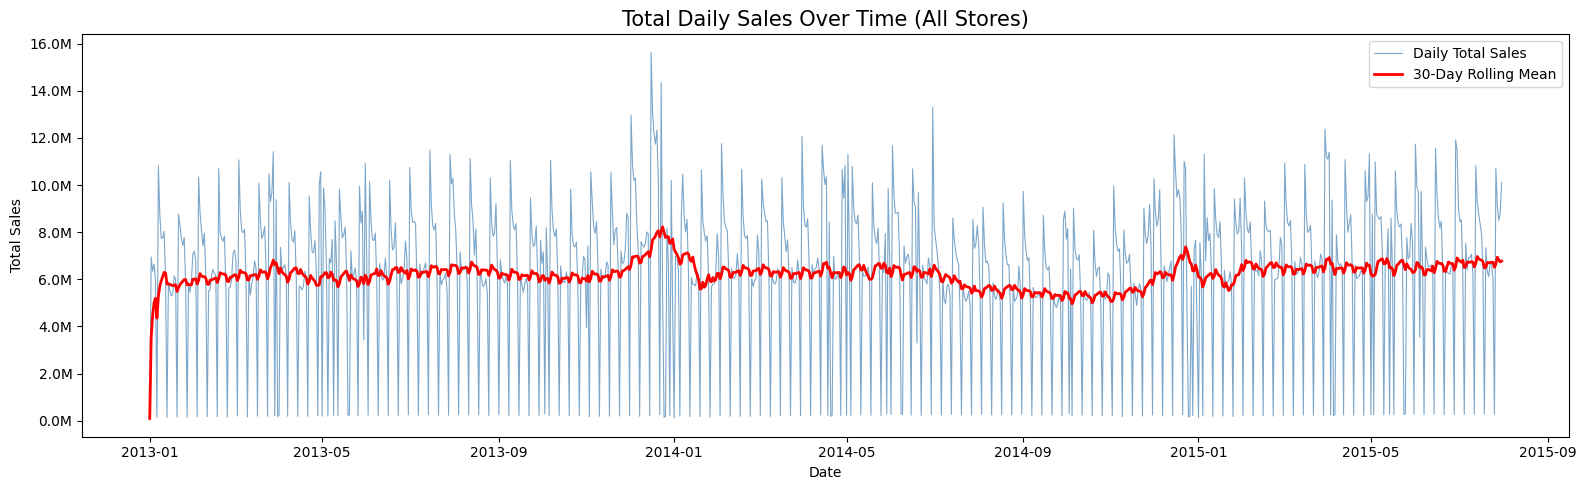

In [15]:
daily_sales = df_open.groupby('Date')['Sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(daily_sales['Date'], daily_sales['Sales'], color='steelblue', linewidth=0.8, alpha=0.7, label='Daily Total Sales')

# 30-day rolling mean
rolling = daily_sales.set_index('Date')['Sales'].rolling('30D').mean()
ax.plot(rolling.index, rolling.values, color='red', linewidth=2, label='30-Day Rolling Mean')

ax.set_title('Total Daily Sales Over Time (All Stores)', fontsize=15)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.legend()
plt.tight_layout()
plt.savefig('../reports/figures/trend_plot.png', dpi=150)
plt.show()

## 8. Seasonality Analysis

In [16]:
# Extract time features
df_open['Year']        = df_open['Date'].dt.year
df_open['Month']       = df_open['Date'].dt.month
df_open['DayOfWeek']   = df_open['Date'].dt.dayofweek   # 0=Mon
df_open['DayOfMonth']  = df_open['Date'].dt.day
df_open['WeekOfYear']  = df_open['Date'].dt.isocalendar().week.astype(int)

month_map   = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
               7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dow_map     = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df_open['MonthName'] = df_open['Month'].map(month_map)
df_open['DayName']   = df_open['DayOfWeek'].map(dow_map)

print('Time features created ✅')

Time features created ✅


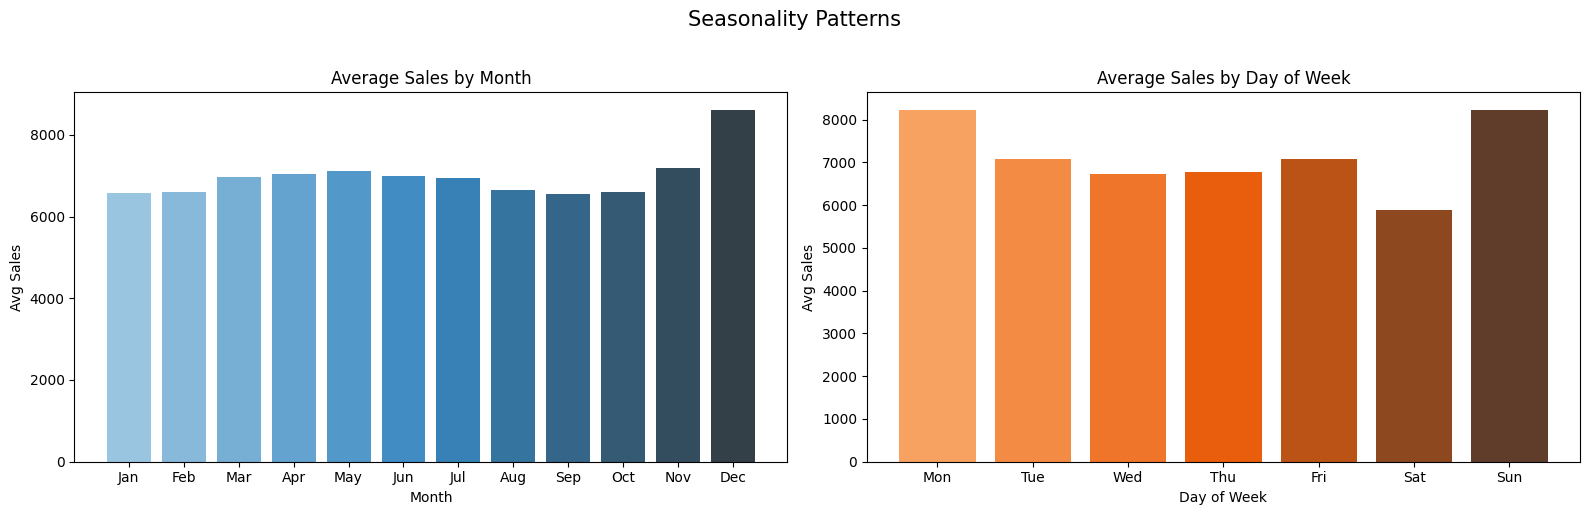

In [17]:
# Monthly seasonality
monthly = df_open.groupby('Month')['Sales'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Monthly average sales
axes[0].bar(monthly['Month'], monthly['Sales'],
            tick_label=[month_map[m] for m in monthly['Month']],
            color=sns.color_palette('Blues_d', 12))
axes[0].set_title('Average Sales by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Avg Sales')

# Day-of-week average sales
dow_sales = df_open.groupby('DayOfWeek')['Sales'].mean().reset_index()
axes[1].bar(dow_sales['DayOfWeek'], dow_sales['Sales'],
            tick_label=[dow_map[d] for d in dow_sales['DayOfWeek']],
            color=sns.color_palette('Oranges_d', 7))
axes[1].set_title('Average Sales by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Avg Sales')

plt.suptitle('Seasonality Patterns', fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/seasonality_plot.png', dpi=150)
plt.show()

In [18]:
df.groupby(['DayOfWeek','Open'])['Sales'].mean()

DayOfWeek  Open
1          0          0.000000
           1       8216.073074
2          0          0.000000
           1       7088.113656
3          0          0.000000
           1       6728.122978
4          0          0.000000
           1       6767.310159
5          0          0.000000
           1       7072.677012
6          0          0.000000
           1       5874.840238
7          0          0.000000
           1       8224.723908
Name: Sales, dtype: float64

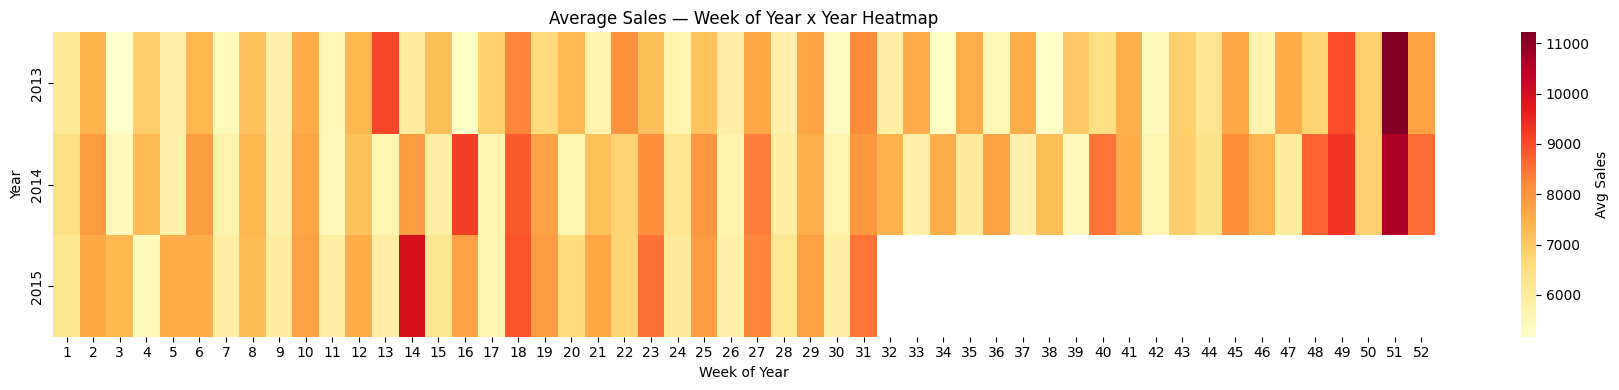

In [20]:
# Week-of-year heatmap
pivot = df_open.groupby(['Year', 'WeekOfYear'])['Sales'].mean().unstack(level=0)

fig, ax = plt.subplots(figsize=(18, 4))
sns.heatmap(pivot.T, cmap='YlOrRd', ax=ax, linewidths=0,
            cbar_kws={'label': 'Avg Sales'}, yticklabels=True)
ax.set_title('Average Sales — Week of Year x Year Heatmap')
ax.set_xlabel('Week of Year')
ax.set_ylabel('Year')
plt.tight_layout()
plt.show()

## 9. Promotion Analysis

          Promo         mean  median   count
0      No Promo  5929.826183  5459.0  467463
1  Promo Active  8228.739731  7650.0  376875


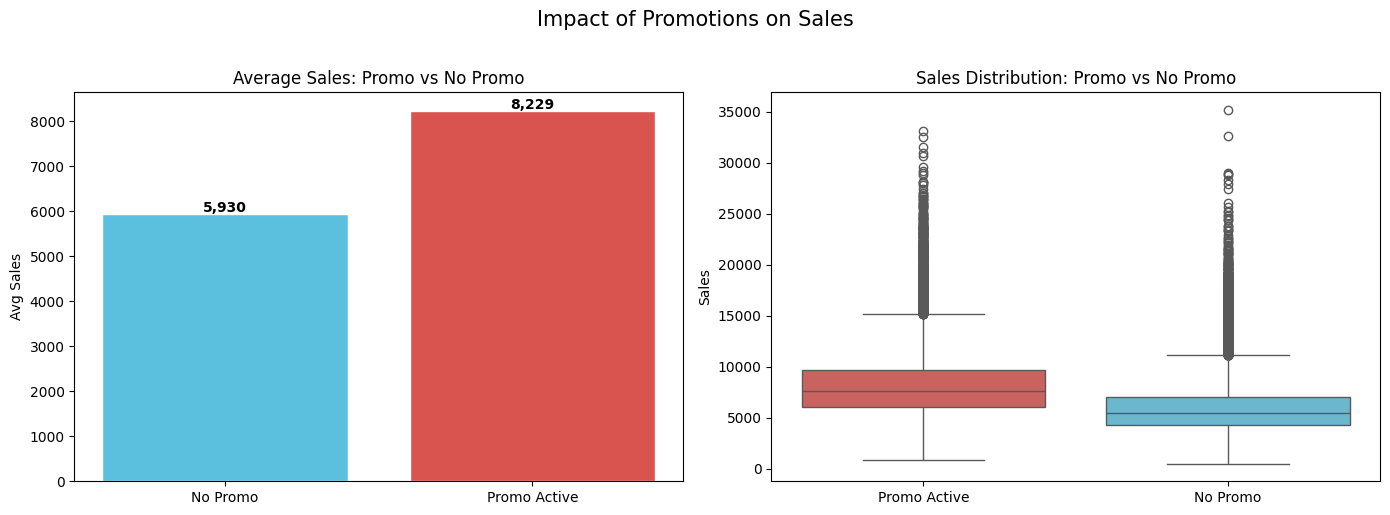


Mann-Whitney U test: stat=131101145045.50, p-value=0.00e+00
Promo significantly increases sales!


In [21]:
promo_sales = df_open.groupby('Promo')['Sales'].agg(['mean', 'median', 'count']).reset_index()
promo_sales['Promo'] = promo_sales['Promo'].map({0: 'No Promo', 1: 'Promo Active'})
print(promo_sales)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mean sales comparison
axes[0].bar(promo_sales['Promo'], promo_sales['mean'],
            color=['#5bc0de', '#d9534f'], edgecolor='white')
axes[0].set_title('Average Sales: Promo vs No Promo')
axes[0].set_ylabel('Avg Sales')
for i, v in enumerate(promo_sales['mean']):
    axes[0].text(i, v + 50, f'{v:,.0f}', ha='center', fontweight='bold')

# Boxplot
df_open_sample = df_open.sample(min(50000, len(df_open)), random_state=42)
df_open_sample['Promo_label'] = df_open_sample['Promo'].map({0: 'No Promo', 1: 'Promo Active'})
sns.boxplot(data=df_open_sample, x='Promo_label', y='Sales', ax=axes[1],
            palette={'No Promo': '#5bc0de', 'Promo Active': '#d9534f'})
axes[1].set_title('Sales Distribution: Promo vs No Promo')
axes[1].set_xlabel('')

plt.suptitle('Impact of Promotions on Sales', fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/promo_impact.png', dpi=150)
plt.show()

# Statistical test
promo_group    = df_open[df_open['Promo'] == 1]['Sales']
no_promo_group = df_open[df_open['Promo'] == 0]['Sales']
t_stat, p_val  = stats.mannwhitneyu(promo_group, no_promo_group, alternative='greater')
print(f'\nMann-Whitney U test: stat={t_stat:.2f}, p-value={p_val:.2e}')
print('Promo significantly increases sales!' if p_val < 0.05 else 'No significant difference.')

In [22]:
# Promo2 (extended promotion) analysis
if 'Promo2' in df_open.columns:
    promo2_sales = df_open.groupby('Promo2')['Sales'].mean().reset_index()
    promo2_sales['Promo2'] = promo2_sales['Promo2'].map({0: 'No Promo2', 1: 'Promo2 Active'})
    print('Average Sales by Promo2:')
    print(promo2_sales)

Average Sales by Promo2:
          Promo2        Sales
0      No Promo2  7350.818414
1  Promo2 Active  6558.993542


## 10. Store Type & Assortment Analysis

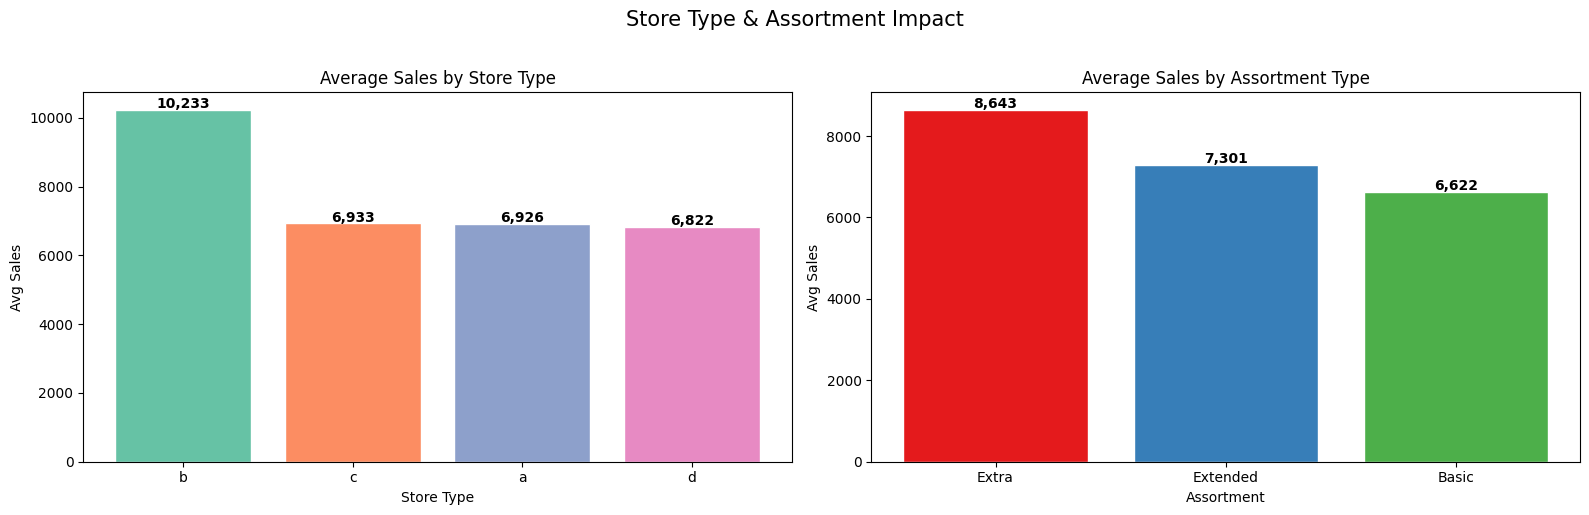

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Store type
store_type_sales = df_open.groupby('StoreType')['Sales'].mean().reset_index().sort_values('Sales', ascending=False)
axes[0].bar(store_type_sales['StoreType'], store_type_sales['Sales'],
            color=sns.color_palette('Set2', 4), edgecolor='white')
axes[0].set_title('Average Sales by Store Type')
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Avg Sales')
for i, (st, v) in enumerate(zip(store_type_sales['StoreType'], store_type_sales['Sales'])):
    axes[0].text(i, v + 50, f'{v:,.0f}', ha='center', fontweight='bold')

# Assortment
assort_sales = df_open.groupby('Assortment')['Sales'].mean().reset_index().sort_values('Sales', ascending=False)
label_map = {'a': 'Basic', 'b': 'Extra', 'c': 'Extended'}
assort_sales['AssortmentLabel'] = assort_sales['Assortment'].map(label_map)
axes[1].bar(assort_sales['AssortmentLabel'], assort_sales['Sales'],
            color=sns.color_palette('Set1', 3), edgecolor='white')
axes[1].set_title('Average Sales by Assortment Type')
axes[1].set_xlabel('Assortment')
axes[1].set_ylabel('Avg Sales')
for i, (a, v) in enumerate(zip(assort_sales['AssortmentLabel'], assort_sales['Sales'])):
    axes[1].text(i, v + 50, f'{v:,.0f}', ha='center', fontweight='bold')

plt.suptitle('Store Type & Assortment Impact', fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/store_type_assortment.png', dpi=150)
plt.show()

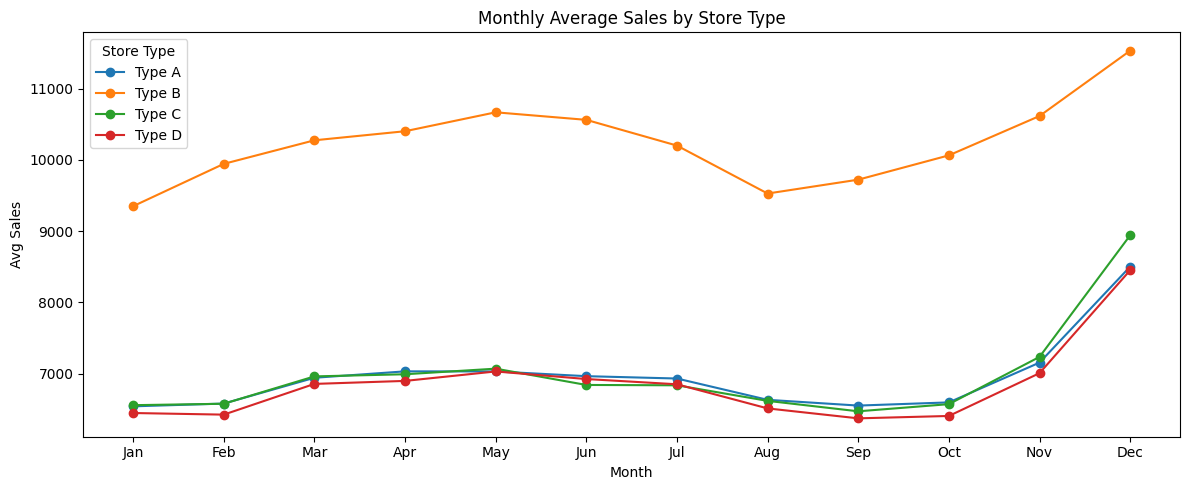

In [24]:
# Sales by StoreType over time
monthly_store = df_open.groupby(['Month', 'StoreType'])['Sales'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
for stype in monthly_store['StoreType'].unique():
    subset = monthly_store[monthly_store['StoreType'] == stype]
    ax.plot(subset['Month'], subset['Sales'], marker='o', label=f'Type {stype.upper()}')

ax.set_title('Monthly Average Sales by Store Type')
ax.set_xlabel('Month')
ax.set_ylabel('Avg Sales')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.legend(title='Store Type')
plt.tight_layout()
plt.show()

## 11. Holiday & School Holiday Analysis

     Holiday Type    Avg Sales   Count
1  Easter Holiday  9887.889655     145
0       Christmas  9743.746479      71
3  Public Holiday  8487.471182     694
2            None  6953.960229  843428


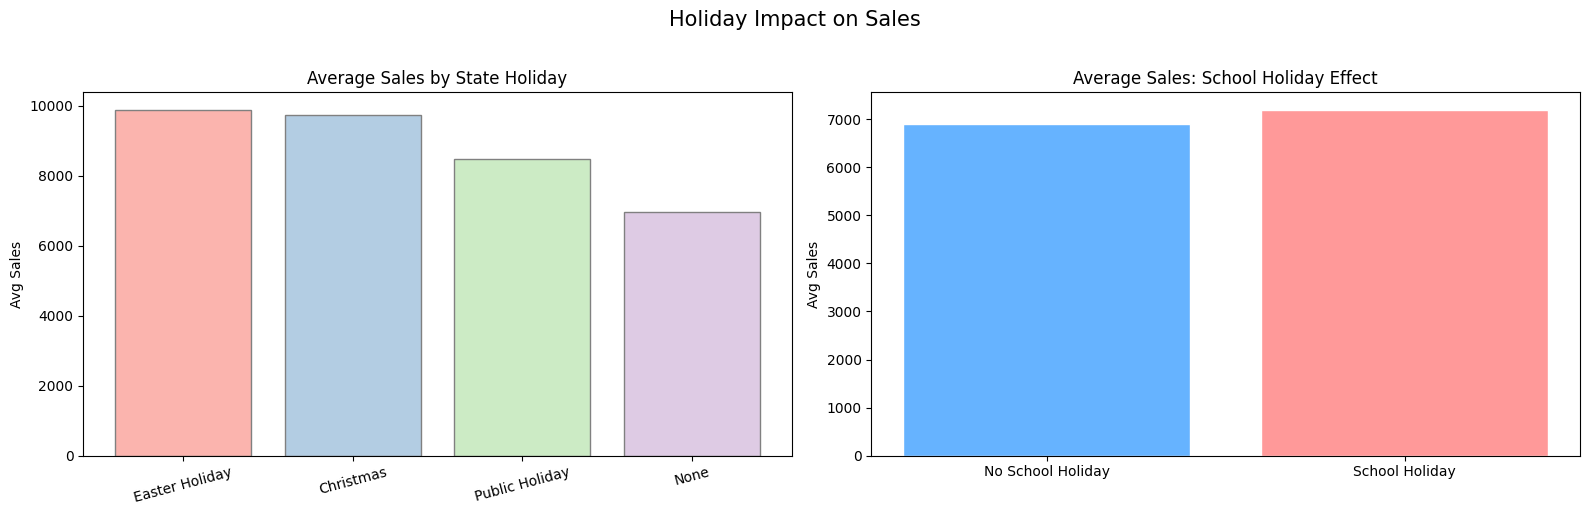

In [25]:
# StateHoliday breakdown
holiday_map = {'0': 'None', 0: 'None', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}
df_open['HolidayLabel'] = df_open['StateHoliday'].astype(str).map(holiday_map).fillna('Other')

holiday_sales = df_open.groupby('HolidayLabel')['Sales'].agg(['mean', 'count']).reset_index()
holiday_sales.columns = ['Holiday Type', 'Avg Sales', 'Count']
print(holiday_sales.sort_values('Avg Sales', ascending=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Average sales
holiday_sorted = holiday_sales.sort_values('Avg Sales', ascending=False)
axes[0].bar(holiday_sorted['Holiday Type'], holiday_sorted['Avg Sales'],
            color=sns.color_palette('Pastel1', len(holiday_sorted)), edgecolor='gray')
axes[0].set_title('Average Sales by State Holiday')
axes[0].set_ylabel('Avg Sales')
axes[0].tick_params(axis='x', rotation=15)

# School holiday
school_sales = df_open.groupby('SchoolHoliday')['Sales'].mean().reset_index()
school_sales['SchoolHoliday'] = school_sales['SchoolHoliday'].map({0: 'No School Holiday', 1: 'School Holiday'})
axes[1].bar(school_sales['SchoolHoliday'], school_sales['Sales'],
            color=['#66b3ff', '#ff9999'], edgecolor='white')
axes[1].set_title('Average Sales: School Holiday Effect')
axes[1].set_ylabel('Avg Sales')

plt.suptitle('Holiday Impact on Sales', fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/holiday_impact.png', dpi=150)
plt.show()

## 12. Competition Analysis

Correlation (CompetitionDistance ~ Sales): -0.0359


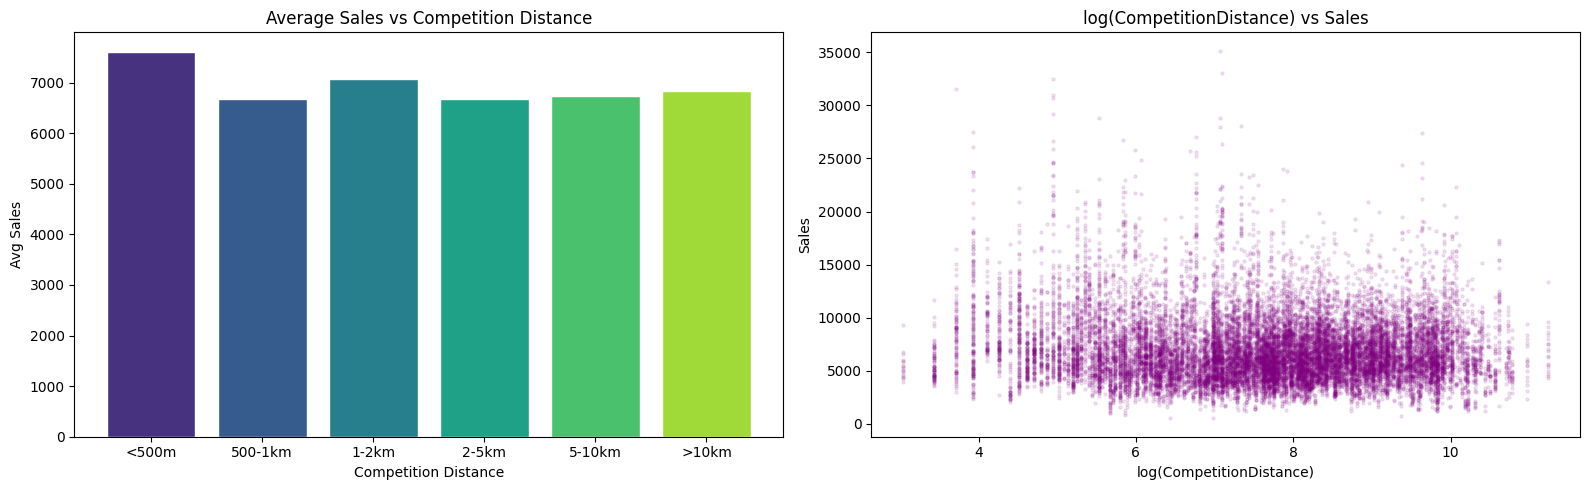

In [26]:
# Competition distance impact
df_open['CompetitionDistance'].fillna(df_open['CompetitionDistance'].median(), inplace=True)

# Bin by distance
bins = [0, 500, 1000, 2000, 5000, 10000, np.inf]
labels = ['<500m', '500-1km', '1-2km', '2-5km', '5-10km', '>10km']
df_open['CompDistBin'] = pd.cut(df_open['CompetitionDistance'], bins=bins, labels=labels)

comp_sales = df_open.groupby('CompDistBin', observed=True)['Sales'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].bar(comp_sales['CompDistBin'].astype(str), comp_sales['Sales'],
            color=sns.color_palette('viridis', len(comp_sales)), edgecolor='white')
axes[0].set_title('Average Sales vs Competition Distance')
axes[0].set_xlabel('Competition Distance')
axes[0].set_ylabel('Avg Sales')

# Scatter: raw competition distance
sample = df_open.sample(min(20000, len(df_open)), random_state=42)
axes[1].scatter(np.log1p(sample['CompetitionDistance']), sample['Sales'],
                alpha=0.1, s=5, color='purple')
axes[1].set_title('log(CompetitionDistance) vs Sales')
axes[1].set_xlabel('log(CompetitionDistance)')
axes[1].set_ylabel('Sales')

corr_comp = df_open[['CompetitionDistance', 'Sales']].corr().iloc[0, 1]
print(f'Correlation (CompetitionDistance ~ Sales): {corr_comp:.4f}')

plt.tight_layout()
plt.savefig('../reports/figures/competition_analysis.png', dpi=150)
plt.show()

## 13. Top & Bottom Performing Stores

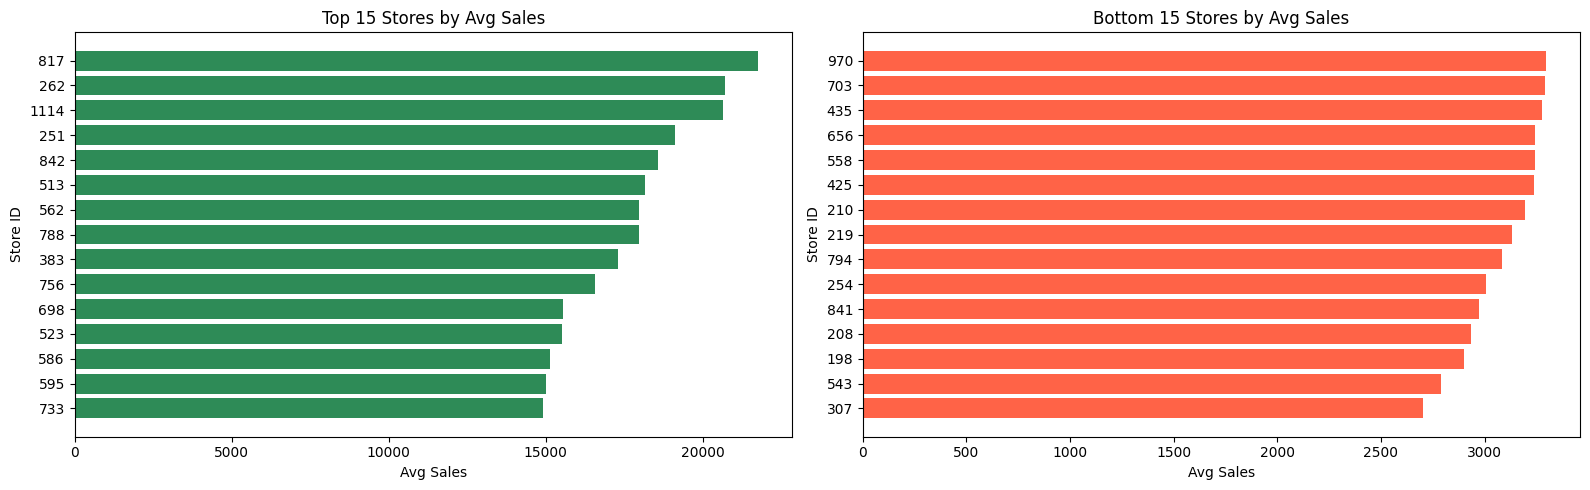

In [27]:
store_avg = df_open.groupby('Store')['Sales'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Top 15 stores
top15 = store_avg.head(15)
axes[0].barh(top15.index.astype(str), top15.values, color='seagreen')
axes[0].invert_yaxis()
axes[0].set_title('Top 15 Stores by Avg Sales')
axes[0].set_xlabel('Avg Sales')
axes[0].set_ylabel('Store ID')

# Bottom 15 stores
bot15 = store_avg.tail(15)
axes[1].barh(bot15.index.astype(str), bot15.values, color='tomato')
axes[1].invert_yaxis()
axes[1].set_title('Bottom 15 Stores by Avg Sales')
axes[1].set_xlabel('Avg Sales')
axes[1].set_ylabel('Store ID')

plt.tight_layout()
plt.savefig('../reports/figures/top_bottom_stores.png', dpi=150)
plt.show()

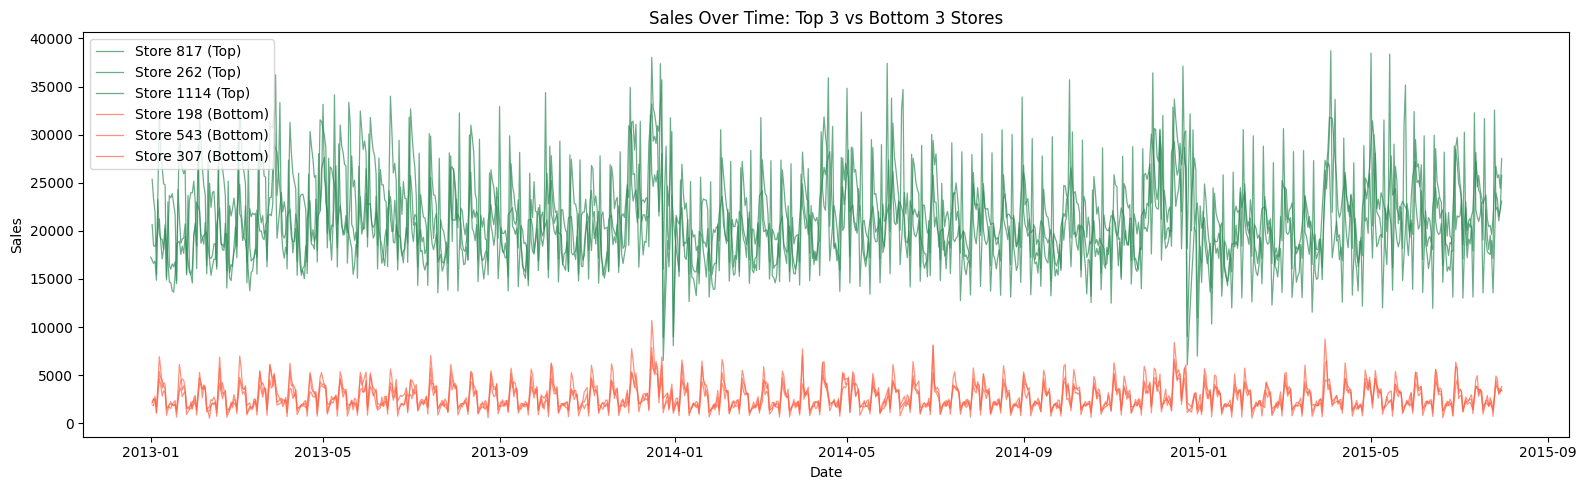

In [28]:
# Time series of top 3 vs bottom 3 stores
top3    = store_avg.head(3).index.tolist()
bot3    = store_avg.tail(3).index.tolist()
select  = top3 + bot3

store_ts = df_open[df_open['Store'].isin(select)].groupby(['Date', 'Store'])['Sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(16, 5))
for s in select:
    subset = store_ts[store_ts['Store'] == s]
    color  = 'seagreen' if s in top3 else 'tomato'
    label  = f'Store {s} (Top)' if s in top3 else f'Store {s} (Bottom)'
    ax.plot(subset['Date'], subset['Sales'], alpha=0.7, label=label, color=color, linewidth=0.9)

ax.set_title('Sales Over Time: Top 3 vs Bottom 3 Stores')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
plt.tight_layout()
plt.show()

## 14. Correlation Matrix

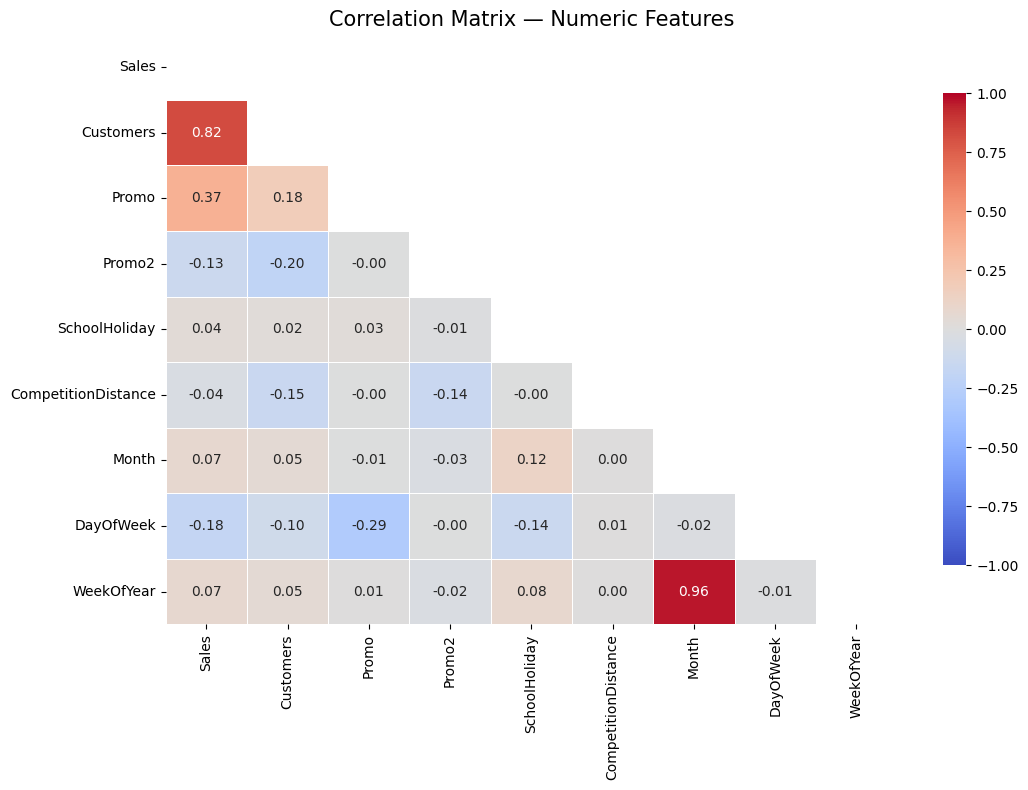

In [29]:
numeric_cols = ['Sales', 'Customers', 'Promo', 'Promo2', 'SchoolHoliday',
                'CompetitionDistance', 'Month', 'DayOfWeek', 'WeekOfYear']

numeric_cols = [c for c in numeric_cols if c in df_open.columns]
corr_matrix  = df_open[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(11, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask, ax=ax, linewidths=0.5,
            vmin=-1, vmax=1, center=0,
            cbar_kws={'shrink': 0.8})
ax.set_title('Correlation Matrix — Numeric Features', fontsize=15)
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png', dpi=150)
plt.show()

## 15. Outlier Detection

Lower bound : -392
Upper bound : 13,612
Outliers    : 30,769 (3.64%)


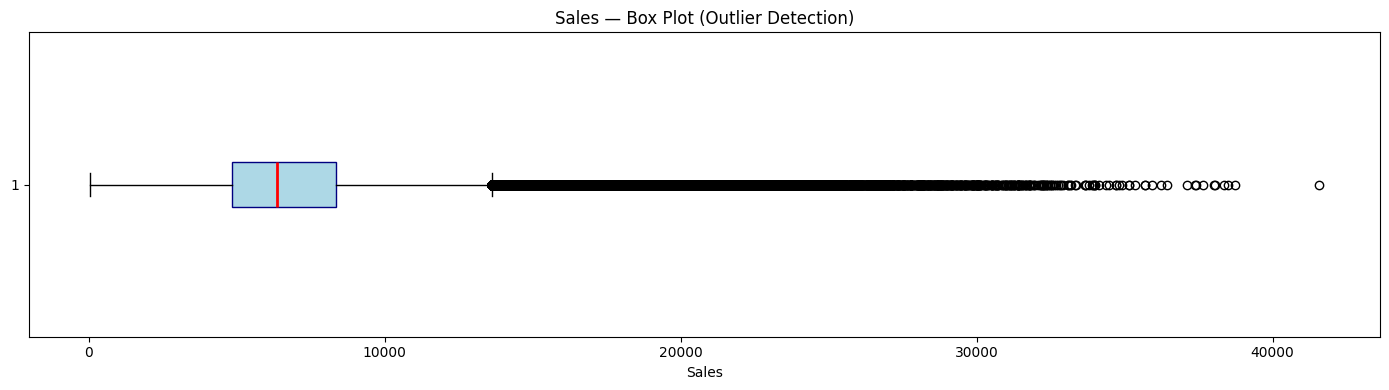

In [30]:
# IQR-based outlier detection for Sales
Q1   = df_open['Sales'].quantile(0.25)
Q3   = df_open['Sales'].quantile(0.75)
IQR  = Q3 - Q1
lower_bound  = Q1 - 1.5 * IQR
upper_bound  = Q3 + 1.5 * IQR
outliers     = df_open[(df_open['Sales'] < lower_bound) | (df_open['Sales'] > upper_bound)]

print(f'Lower bound : {lower_bound:,.0f}')
print(f'Upper bound : {upper_bound:,.0f}')
print(f'Outliers    : {len(outliers):,} ({len(outliers)/len(df_open)*100:.2f}%)')

fig, ax = plt.subplots(figsize=(14, 4))
ax.boxplot(df_open['Sales'], vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='navy'),
           medianprops=dict(color='red', linewidth=2))
ax.set_title('Sales — Box Plot (Outlier Detection)')
ax.set_xlabel('Sales')
plt.tight_layout()
plt.show()

## 16. EDA Summary & Key Insights

## Dataset                                                         
  • ~1 million training records across 1115 stores (2013–2015)    
  • store.csv has several missing columns (CompetitionDistance,Promo2SinceWeek, etc.) needing imputation

## Target Variable (Sales)                                         
• Right-skewed → log-transform recommended for modeling         
• Strong positive correlation with Customers (r≈0.82)

## Temporal Patterns                                               
• Monday shows highest average sales
• Saturday relatively lowest
• Strong weekly seasonality present

## Promotions                                                      
• Promo increases sales significantly (p < 0.001)               
• Promo should be a key feature in all models

## Store Type                                                      
✔ Type b stores have highest avg sales
✔ Extra assortment outperforms Extended and Basic

## Competition                                                     
✔ CompetitionDistance shows very weak linear correlation
✔ Effect appears non-linear
✔ log(CompetitionDistance) slightly more informative

## Next Steps → Notebook 02: Feature Engineering                   
• Create lag features, rolling means, date-based features       
• Encode categorical variables                                  
• Handle missing values & outliers


In [32]:
# Save cleaned merged dataframe for next notebook
df_open.to_csv('../data/processed/cleaned_sales_data.csv', index=False)
print('Saved cleaned_sales_data.csv to data/processed/ ✅')

Saved cleaned_sales_data.csv to data/processed/ ✅
